In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import re #to handle regular expression when replacing
#let's import a library do deal with stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#needed for ex3 e)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Start by loading the data set (train.csv)
df = pd.read_csv('train.csv')

# Print train.csv
print(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ..

In [2]:
# 1. Data Exploration and Preparation

# There is an error in two columns in the data set, so we need to fix it
# We need to switch the columns 'Employment Duration' and 'Home Ownership'
print("O data set antes da troca é: \n" )

print(df['Employment Duration'].head())
print(df['Home Ownership'].head())

df['Employment Duration'], df['Home Ownership'] = df['Home Ownership'], df['Employment Duration']

print("\nO data set depois da troca é: \n" )

print(df['Employment Duration'].head())
print(df['Home Ownership'].head())

O data set antes da troca é: 

0    MORTGAGE
1        RENT
2    MORTGAGE
3    MORTGAGE
4    MORTGAGE
Name: Employment Duration, dtype: object
0    176346.62670
1     39833.92100
2     91506.69105
3    108286.57590
4     44234.82545
Name: Home Ownership, dtype: float64

O data set depois da troca é: 

0    176346.62670
1     39833.92100
2     91506.69105
3    108286.57590
4     44234.82545
Name: Employment Duration, dtype: float64
0    MORTGAGE
1        RENT
2    MORTGAGE
3    MORTGAGE
4    MORTGAGE
Name: Home Ownership, dtype: object


In [3]:
# Number of rows
linhas = len(df)
print("Number of rows: " + str(linhas))

# Number of collumns
colunas = len(df.columns)
print("Number of columns: " + str(colunas))

# Collumns Names
col_names = df.columns
print(col_names)

Number of rows: 67463
Number of columns: 35
Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')


In [4]:
# View the first rows of the data set and then the last rows
first = df.head()
last = df.tail()
print("The first rows are:\n" + str(first) + "\n The last rows are: \n" + str(last))

The first rows are:
         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade  Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4         176346.62670  ...   
1     BAT1586599      12.237563     C        D3          39833.92100  ...   
2     BAT2136391      12.545884     F        D4          91506.69105  ...   
3     BAT2428731      16.731201     C        C3         108286.57590  ...   
4     BAT5341619      15.008300     C        D4          44234.82545  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2

In [5]:
# Data exploration
# Size
size = df.size
print('O tamanho do data set é: ' + str(size))

# Get a Summary of Data
describe = df.describe()
print("\n"+ str(describe))

O tamanho do data set é: 2361205



                 ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Employment Duration  Debit to Income  \
count  67463.000000   67463.000000         67463.000000     67463.000000   
mean      58.173814      11.846258         80541.502522        23.299241   
std        3.327441       3.718629         45029.120366         8.451824   
min       

In [9]:
# Check which columns are Numeric and which are Categorical
dtypes = df.dtypes
print("Os data types são: \n" + str(dtypes) )

Os data types são: 
ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration             float64
Home Ownership                   object
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late 

In [10]:
# Check for missing data by rows and by columns
# By rows
missing_rows = df.isnull().any(axis = 1)
print(missing_rows)
dframe_missing_rows = df[missing_rows] # Doesn't have missing rows
print(dframe_missing_rows)

# By columns
columns_with_NaN = df.isnull().sum() # Doesn't have NaN in columns
print(columns_with_NaN)

0        False
1        False
2        False
3        False
4        False
         ...  
67458    False
67459    False
67460    False
67461    False
67462    False
Length: 67463, dtype: bool
Empty DataFrame
Columns: [ID, Loan Amount, Funded Amount, Funded Amount Investor, Term, Batch Enrolled, Interest Rate, Grade, Sub Grade, Employment Duration, Home Ownership, Verification Status, Payment Plan, Loan Title, Debit to Income, Delinquency - two years, Inquires - six months, Open Account, Public Record, Revolving Balance, Revolving Utilities, Total Accounts, Initial List Status, Total Received Interest, Total Received Late Fee, Recoveries, Collection Recovery Fee, Collection 12 months Medical, Application Type, Last week Pay, Accounts Delinquent, Total Collection Amount, Total Current Balance, Total Revolving Credit Limit, Loan Status]
Index: []

[0 rows x 35 columns]
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Inves

In [11]:
# Verify if have duplicate rows
print(size)
df_duplicates = df.drop_duplicates(inplace = True)
print(df.size) # Doesn't have duplicate rows

2361205
2361205


In [42]:
# Get numerical columns
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print("Numerical columns: " + str(numerical_columns))

Numerical columns: ['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


Categorical columns: ['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']


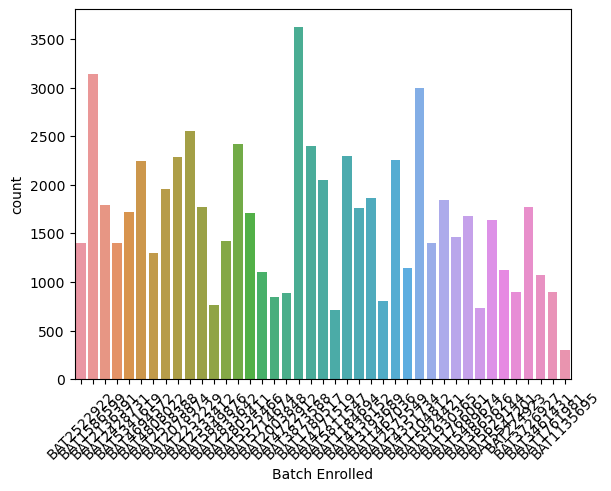

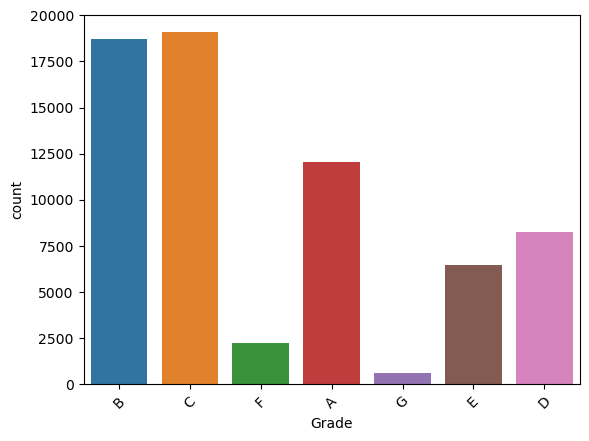

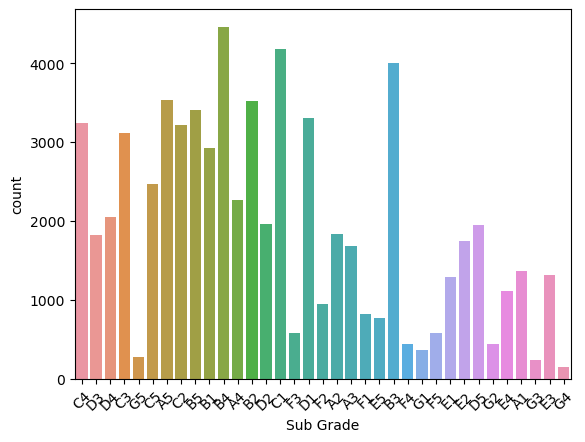

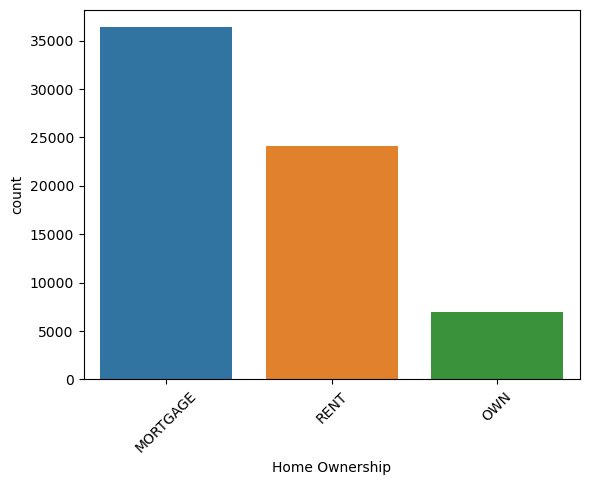

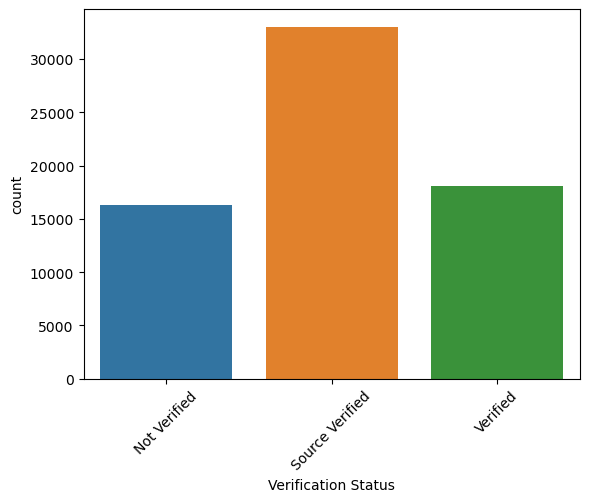

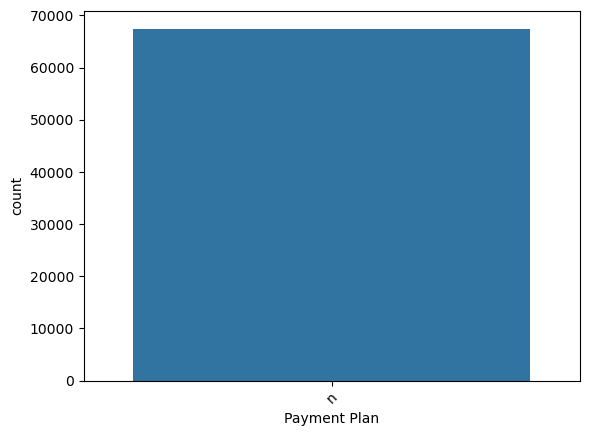

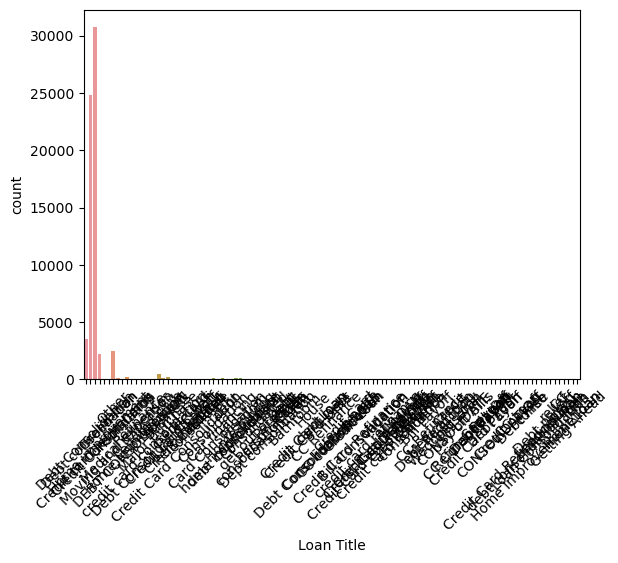

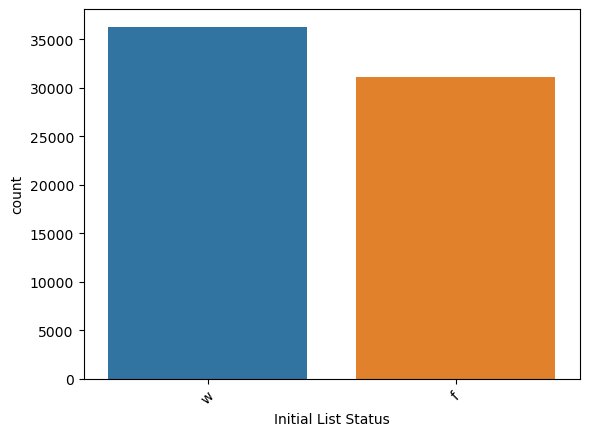

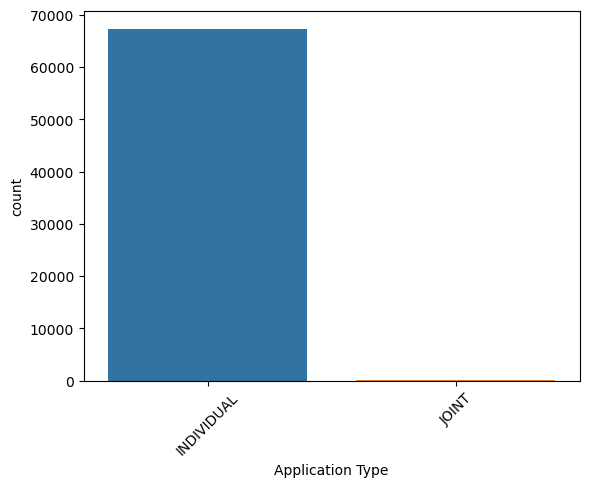

In [12]:
# Get categorical columns
categorical_columns = df.select_dtypes(include = ['object']).columns.tolist()
print("Categorical columns: " + str(categorical_columns))

for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.show()
# We can't see very well Batch Enrolled, Sub Grade and Loan Title plots

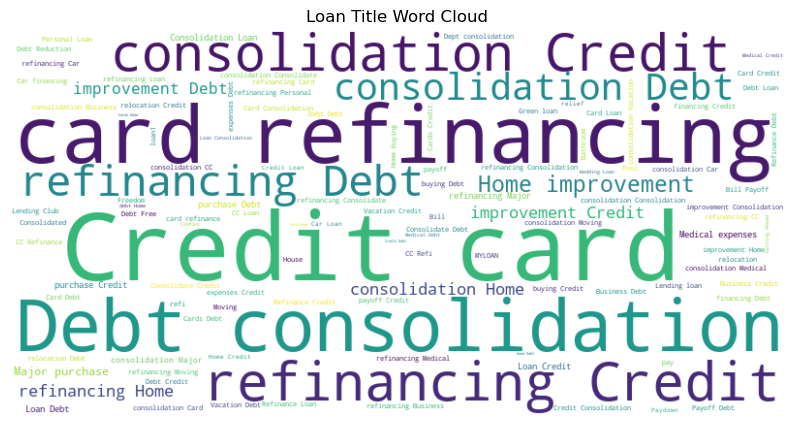

In [14]:
# To Loan Title we use Word Cloud plot
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['Loan Title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Loan Title Word Cloud')
plt.show()

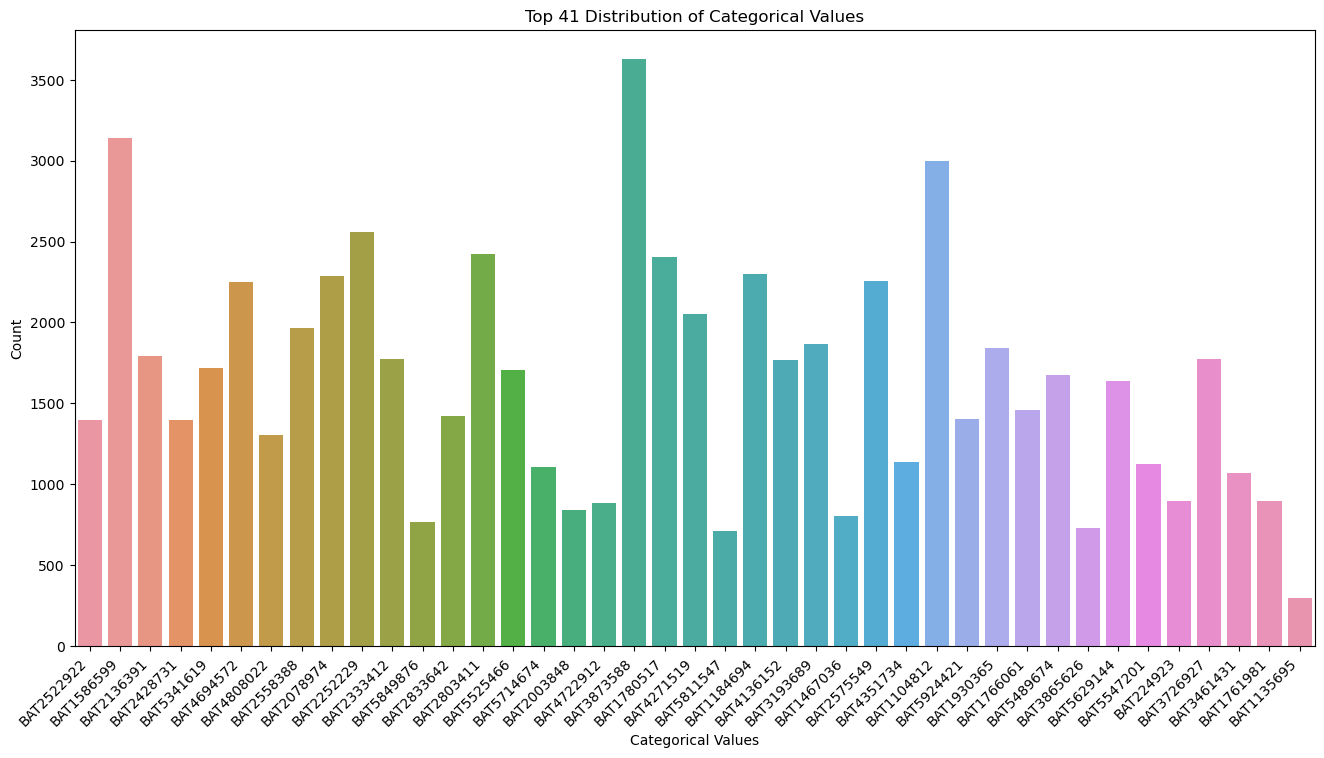

In [45]:
# To column of Batch Enrolled we use Top N Bar Plot
top_n_values = 41
top_values = df['Batch Enrolled'].value_counts().nlargest(top_n_values).index

plt.figure(figsize=(16, 8))
sns.countplot(x='Batch Enrolled', data=df[df['Batch Enrolled'].isin(top_values)])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categorical Values')
plt.ylabel('Count')
plt.title(f'Top {top_n_values} Distribution of Categorical Values')
plt.show()

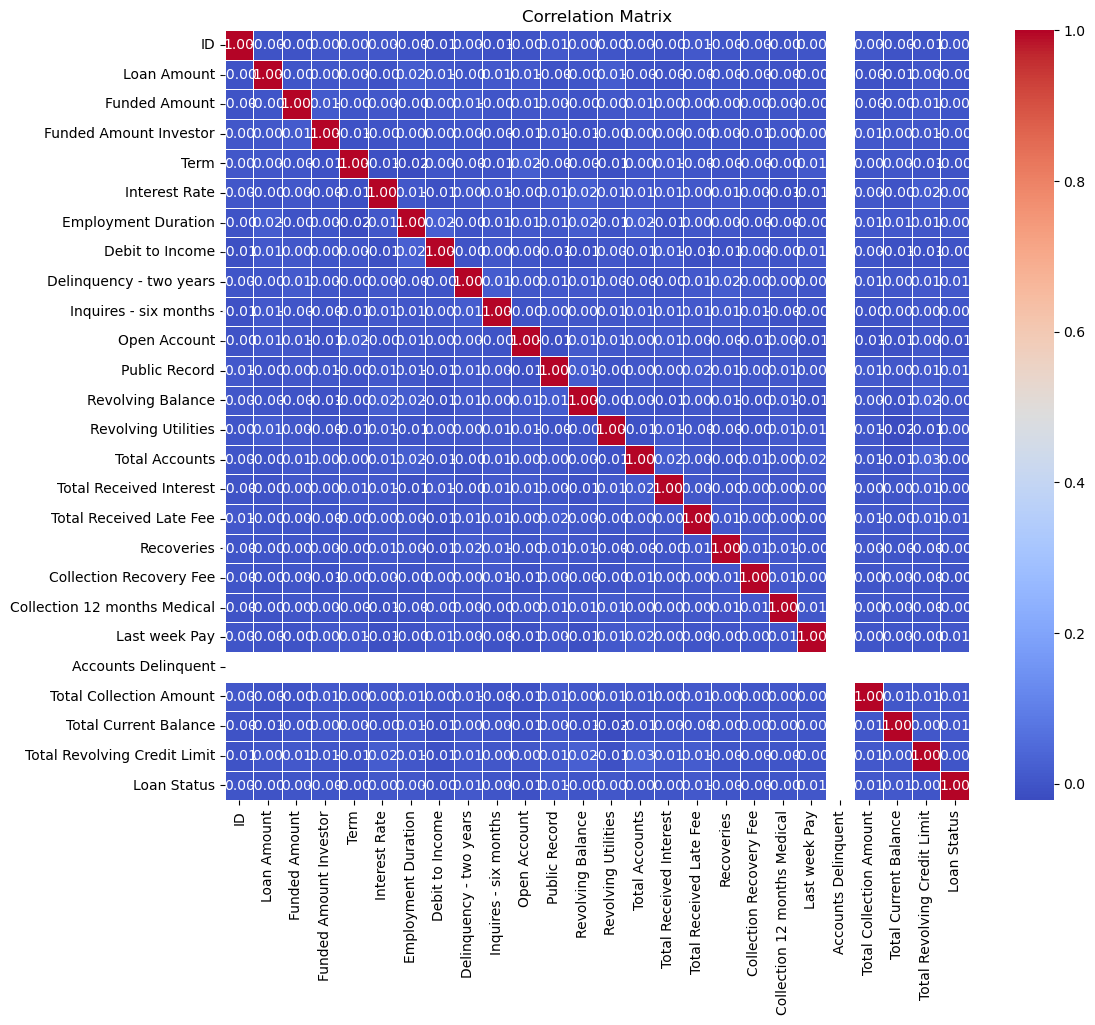

In [51]:
# Let's check the correlation between variables
correlation_num = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_num, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
